In [116]:
%reset
import os
import scipy as sc
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import pycountry

from matplotlib import style
from pandas.plotting import scatter_matrix 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

# graphics
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

Once deleted, variables cannot be recovered. Proceed (y/[n])? Y


In [253]:
df= pd.read_csv ('most_backed.csv')
df.location.unique()

array(['Los Angeles, CA', 'Denver, CO', 'San Diego, CA',
       'San Francisco, CA', 'Palo Alto, CA', 'Newport Beach, CA',
       'Irvine, CA', 'Derby, UK', 'Toronto, Canada', 'Tokyo, Japan',
       'Redwood City, CA', 'Dallas, TX', 'Portland, OR', 'Minneapolis, MN',
       'Chicago, IL', 'Kirkland, WA', 'Sacramento, CA', 'Oakland, CA',
       'Bellevue, WA', 'Prague, Czech Republic', 'Stockport, UK',
       'Austin, TX', 'New York, NY', 'Anacortes, WA', 'Montreal, Canada',
       'Boston, MA', 'Cambridge, UK', 'Miami, FL', 'Pasadena, CA',
       'San Jose, CA', 'Atlanta, GA', 'Spokane, WA', 'Beijing, China',
       'Oslo, Norway', 'Cambridge, MA', 'Vancouver, WA', 'Plano, TX',
       'Melbourne, AU', 'Ghent, Belgium', 'Orem, UT', 'Lake Forest, CA',
       'Denton, TX', 'St. Louis, MO', 'Alpine, UT', 'Umeå, Sweden',
       'Seattle, WA', 'Guildford, UK', 'Brooklyn, NY', 'Niagara Falls, NY',
       'Las Vegas, NV', 'Munich, Germany', 'Carlsbad, CA',
       'Isle of Wight, UK', 'Sydney, 

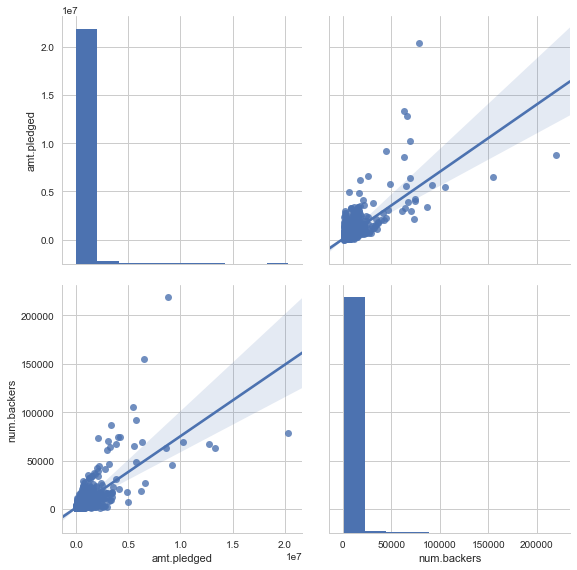

In [254]:
dfplot = df[['pledge.tier','amt.pledged', 'num.backers','num.backers.tier']]
sns.pairplot(dfplot, kind="reg", size=4)

In [255]:
dfplot.head()

,pledge.tier,amt.pledged,num.backers,num.backers.tier
0,"[20.0, 35.0, 100.0, 500.0]",8782571.0,219382,"[15505, 202934, 200, 5]"
1,"[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",6465690.0,154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ..."
2,"[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....",5408916.0,105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ..."
3,"[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",5702153.0,91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ..."
4,"[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",3336371.0,87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]"


In [256]:
df['percentage.funded'] = (df['amt.pledged'] / df['goal']) * 100
df['blurb.size'] = df['blurb'].str.split().str.len()
df['title.size'] = df['title'].str.split().str.len()

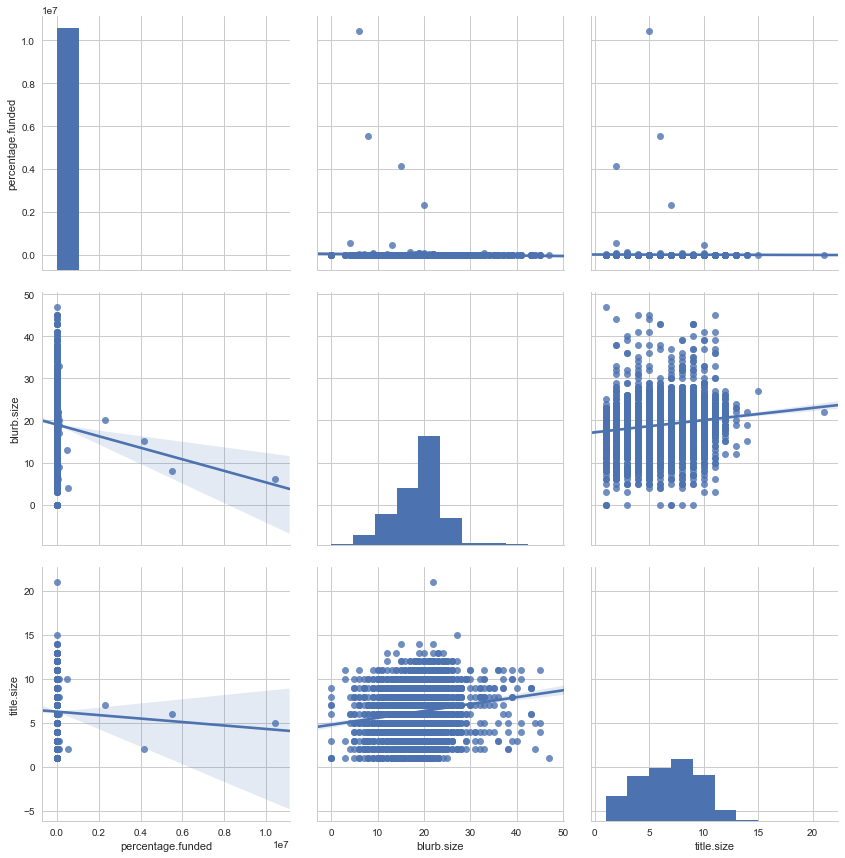

In [257]:
dfplot = df[['percentage.funded','blurb.size','title.size']]
sns.pairplot(dfplot, kind="reg", size=4)

In [258]:
len(dfplot[dfplot['percentage.funded'] > 5000].index)

126

In [259]:
dfplot = dfplot.drop(dfplot[dfplot['percentage.funded'] > 5000].index)
dfplot['percentage.funded.log'] = np.log(dfplot['percentage.funded'])
dfplot.head()

,percentage.funded,blurb.size,title.size,percentage.funded.log
2,540.891600,22,8,6.293219
3,285.107650,25,5,5.652867
4,834.092750,10,3,6.726345
5,4067.797200,22,7,8.310857
6,465.436333,32,4,6.142975


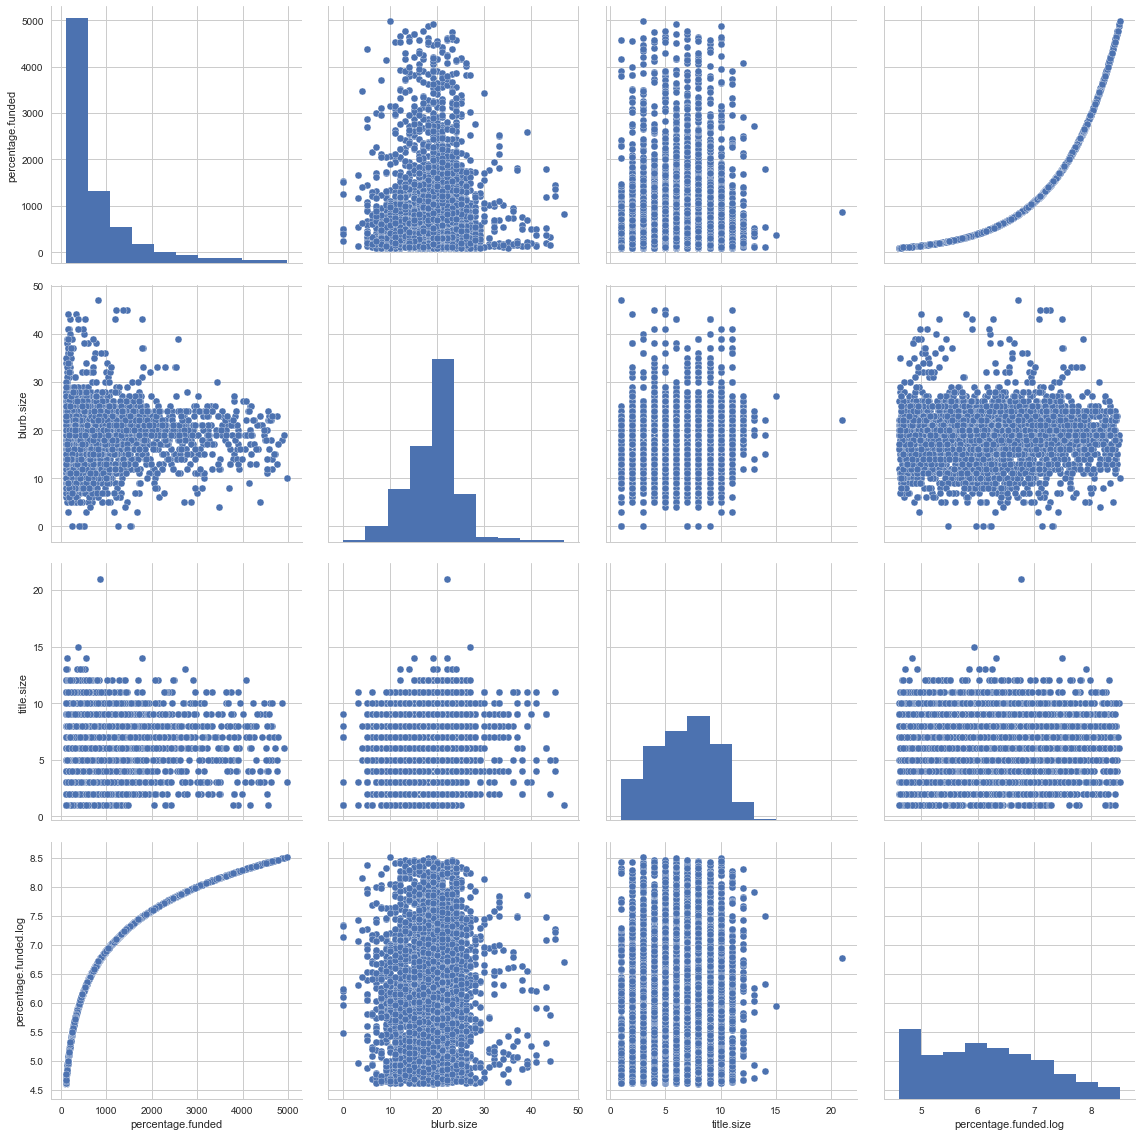

In [260]:
sns.pairplot(dfplot, size=4)

In [261]:
df['category'].unique()

array(['Tabletop Games', 'Product Design', 'Web', 'Narrative Film',
       'Video Games', 'Technology', 'Gaming Hardware', 'Television',
       'Hardware', 'Music', 'Space Exploration', 'Radio &amp; Podcasts',
       'Flight', 'Sound', 'Animation', 'Games', 'Action', 'Gadgets',
       'Documentary', '3D Printing', 'DIY Electronics', 'Publishing',
       'Fashion', 'Comics', 'Typography', "Children's Books", 'Apparel',
       'Food', 'Crafts', 'Camera Equipment', 'Comedy', 'Design',
       'Graphic Design', 'Apps', 'Hip-Hop', 'World Music',
       'Film &amp; Video', 'Drinks', 'Wearables', 'Accessories',
       'Footwear', 'Science Fiction', 'Art Books', 'Nonfiction', 'Robots',
       'Art', 'Software', 'Chiptune', 'Webseries', 'Webcomics', 'Rock',
       'Playing Cards', 'Cookbooks', 'Fantasy', 'Photography',
       'Anthologies', 'Faith', 'Mixed Media', 'Metal', 'Small Batch',
       'Classical Music', 'Architecture', 'Pop', 'Dance',
       'Electronic Music', 'Graphic Novels', 'Music

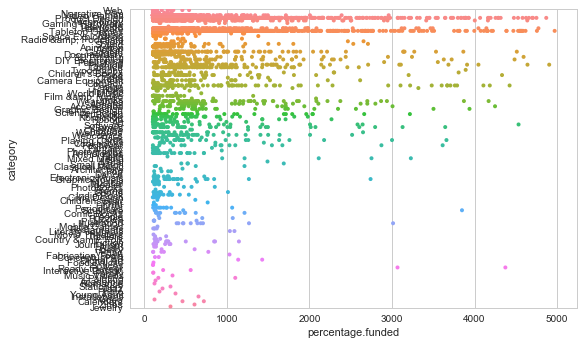

In [262]:
dfplot = df[['percentage.funded','category']]
dfplot = dfplot.drop(dfplot[dfplot['percentage.funded'] > 5000].index)
sns.stripplot(data=dfplot, y='category', x='percentage.funded', size=4)

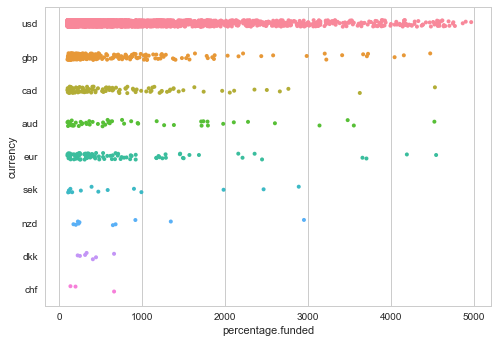

In [263]:
dfplot = df[['percentage.funded','currency']]
dfplot = dfplot.drop(dfplot[dfplot['percentage.funded'] > 5000].index)
sns.stripplot(data=dfplot, y='currency', x='percentage.funded', jitter=True, size=4)

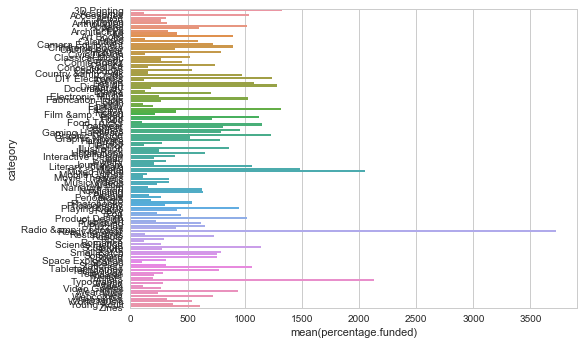

In [264]:
dfplot = df[['percentage.funded','category']]
dfplot = dfplot.drop(dfplot[dfplot['percentage.funded'] > 5000].index)
dfplot = dfplot.groupby('category', as_index=False)['percentage.funded'].mean()
sns.barplot(data=dfplot, y='category', x='percentage.funded')

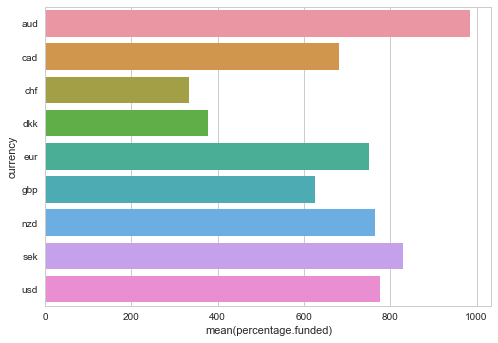

In [265]:
dfplot = df[['percentage.funded','currency']]
dfplot = dfplot.drop(dfplot[dfplot['percentage.funded'] > 5000].index)
dfplot = dfplot.groupby('currency', as_index=False)['percentage.funded'].mean()
sns.barplot(data=dfplot, y='currency', x='percentage.funded')

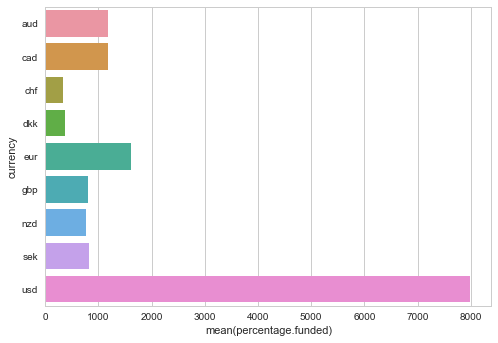

In [266]:
dfplot = df[['percentage.funded','currency']]
dfplot = dfplot.groupby('currency', as_index=False)['percentage.funded'].mean()
sns.barplot(data=dfplot, y='currency', x='percentage.funded')

In [267]:
dfplot.currency.unique()

array(['aud', 'cad', 'chf', 'dkk', 'eur', 'gbp', 'nzd', 'sek', 'usd'], dtype=object)

In [268]:
def curr_to_country(curr_name):
    if curr_name == 'eur':
        return("EUR")
    else:
        currency = pycountry.currencies.get(alpha_3=curr_name.upper())
        return(pycountry.countries.get(numeric=currency.numeric).alpha_3)

In [269]:
dfplot['rel_percentage_funded'] = 1- dfplot['percentage.funded']  / dfplot['percentage.funded'].sum()

In [270]:
for index, row in dfplot.iterrows():
    dfplot.loc[index,'country'] = curr_to_country(row.currency)
print(dfplot)

  currency  percentage.funded  rel_percentage_funded country
0      aud        1189.477803               0.921117     AUS
1      cad        1173.239251               0.922194     CAN
2      chf         332.932845               0.977921     CHE
3      dkk         376.912075               0.975004     DNK
4      eur        1614.058780               0.892959     EUR
5      gbp         813.772591               0.946033     GBR
6      nzd         763.679238               0.949355     NZL
7      sek         828.532092               0.945054     SWE
8      usd        7986.343640               0.470365     USA


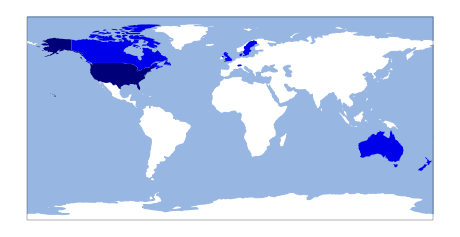

In [271]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    for index, item in dfplot.iterrows():
        if country.attributes['adm0_a3'] == item['country']:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=(0, 0, item['rel_percentage_funded']),
                              label=country.attributes['adm0_a3'])

plt.show()